In [11]:
from langgraph.graph import StateGraph, START, MessagesState
from langgraph.checkpoint.memory import InMemorySaver
from dotenv import load_dotenv

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages.utils import trim_messages,count_tokens_approximately

In [12]:
load_dotenv()

True

In [13]:
model = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash"
)

E0000 00:00:1767807608.935130    5613 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [14]:
MAX_TOKENS = 150

In [15]:
def call_model(state: MessagesState):
    
    # Trim conversation history -> last N messages that fit within the token budget
    messages = trim_messages(
        state["messages"],
        strategy="last",                      
        token_counter=count_tokens_approximately, # to count tokens
        max_tokens=MAX_TOKENS
    )

    print('Current Token Count ->', count_tokens_approximately(messages=messages))

    for message in messages:
        print(message.content)

    response = model.invoke(messages)

    return {"messages": [response]}

In [16]:
builder = StateGraph(MessagesState)
builder.add_node("call_model", call_model)
builder.add_edge(START, "call_model")

In [17]:
checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

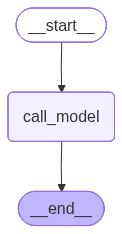

In [18]:
graph

In [19]:
config = {"configurable": {"thread_id": "chat-1"}}

result = graph.invoke(
    {"messages": [{"role": "user", "content": "Hi, my name is Rishu."}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 10
Hi, my name is Rishu.


"Hello Rishu! It's nice to meet you.\n\nHow can I help you today?"

In [20]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "I am learning LangGraph."}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 41
Hi, my name is Rishu.
Hello Rishu! It's nice to meet you.

How can I help you today?
I am learning LangGraph.


"That's fantastic, Rishu! LangGraph is a powerful and incredibly useful library for building robust, stateful multi-actor applications and agents with LLMs. It's a great choice for creating complex, interactive AI systems.\n\nWhat stage are you at in your learning journey? Are you:\n\n*   Just getting started with the core concepts (nodes, edges, state)?\n*   Exploring specific features like cycles, memory, or human-in-the-loop?\n*   Working on a particular project or example?\n*   Running into any specific challenges or questions?\n\nI'd be happy to help with explanations, code examples, debugging, or pointing you to useful resources!"

In [21]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "Can you explain short term memory?"}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 13
Can you explain short term memory?


'Short-term memory (STM) is a temporary storage system that holds a limited amount of information for a brief period, allowing us to actively process and use it in the present moment. Think of it as your brain\'s mental "scratchpad" or "RAM."\n\nHere\'s a breakdown of its key characteristics:\n\n1.  **Limited Duration:**\n    *   Information in STM typically lasts for only about **15 to 30 seconds** if it\'s not actively rehearsed or attended to.\n    *   Without conscious effort (like repeating a number to yourself), the information quickly fades or is replaced by new incoming information.\n\n2.  **Limited Capacity:**\n    *   STM can only hold a small amount of information at any given time.\n    *   A classic finding by psychologist George A. Miller (1956) suggested its capacity is roughly **"7 plus or minus 2" items or "chunks"** of information.\n    *   **Chunking** is a strategy where you group discrete pieces of information into larger, more meaningful units. For example, rememb

In [22]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "What is my name?"}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 8
What is my name?


Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 5, model: gemini-2.5-flash
Please retry in 57.08096809s. [links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 5
}

"I don't know your name. As an AI, I don't have access to personal information about you."

In [23]:
for item in graph.get_state({"configurable": {"thread_id": "chat-1"}}).values['messages']:
    print(item.content)
    print('-'*120)

Hi, my name is Rishu.
------------------------------------------------------------------------------------------------------------------------
Hello Rishu! It's nice to meet you.

How can I help you today?
------------------------------------------------------------------------------------------------------------------------
I am learning LangGraph.
------------------------------------------------------------------------------------------------------------------------
That's fantastic, Rishu! LangGraph is a powerful and incredibly useful library for building robust, stateful multi-actor applications and agents with LLMs. It's a great choice for creating complex, interactive AI systems.

What stage are you at in your learning journey? Are you:

*   Just getting started with the core concepts (nodes, edges, state)?
*   Exploring specific features like cycles, memory, or human-in-the-loop?
*   Working on a particular project or example?
*   Running into any specific challenges or question